In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
data=pd.read_csv("quora_duplicate_questions.csv")
data.head(5)

,index,id,qid1,qid2,question1,question2,is_duplicate
0,0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
4,4,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345036 entries, 0 to 345035
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         345036 non-null  int64 
 1   id            345036 non-null  int64 
 2   qid1          345036 non-null  int64 
 3   qid2          345036 non-null  int64 
 4   question1     345035 non-null  object
 5   question2     345034 non-null  object
 6   is_duplicate  345036 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 18.4+ MB


In [8]:
new_data=data.sample(30000,random_state=2)
new_data

,index,id,qid1,qid2,question1,question2,is_duplicate
297803,297803,349003,683776,683777,How many gallons are in a 100 lb propane tank?,How much propane can a 2.5 lb tank hold?,0
99927,99927,117051,232011,232012,Is it theoretically possible to travel through...,Is it possible to travel to alternate universe?,1
175435,175435,205528,405483,405484,How do you serve pierogi?,What are some great ways to serve pierogies?,1
268694,268694,314880,617951,617952,Which is the best attack strategy for TH5 in C...,Clash of Clans: How can I make my base stronge...,0
232503,232503,272524,535944,535945,Which company is better for a fresher to join ...,Which is better to join as a fresher: Cognizan...,0
...,...,...,...,...,...,...,...
113654,113654,133139,263673,263674,Does critical thinking help to burn calories?,Does thinking really hard burn more calories?,1
234623,234623,275007,540752,540753,How can you determine if a bacteria es eukarotic?,How can you determine if bacteria is eukaryotic?,1
181639,181639,212776,419629,419630,How do I naturally gain testosterone?,How many hours / week need to be practised in ...,0
166961,166961,195616,386102,386103,Why don’t some Americans believe in God?,Why don’t some people believe in God?,0


In [9]:
new_data.isnull().sum()

index           0
id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [11]:
(new_data['is_duplicate'].value_counts()/new_data['is_duplicate'].count())*100

is_duplicate
0    60.583333
1    39.416667
Name: count, dtype: float64

<Axes: xlabel='is_duplicate'>

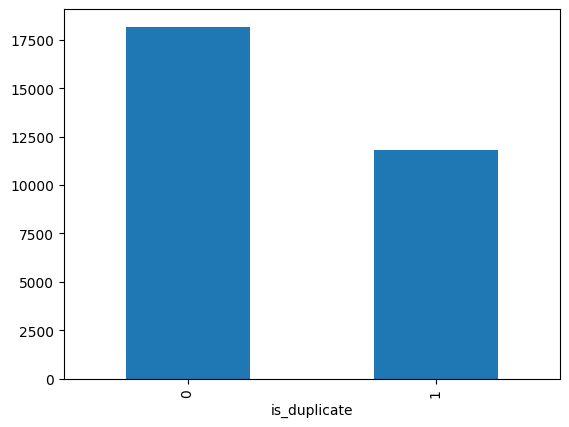

In [13]:
new_data['is_duplicate'].value_counts().plot(kind='bar')

In [22]:
#Repeated questions


# Repeated questions


qid=pd.Series(new_data['qid1'].tolist() + new_data['qid2'].tolist())
print("Number of UNique questions,",np.unique(qid).shape[0])
x=qid.value_counts()>1
print("Number of Unique questions",x[x].shape[0])

Number of UNique questions, 59838
Number of Unique questions 148


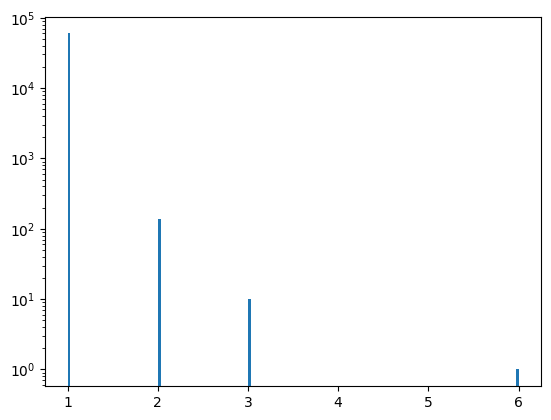

In [31]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()


In [33]:
#feature Engineering
new_data['q1_len']=new_data["question1"].str.len()
new_data['q2_len']=new_data["question2"].str.len()

In [38]:
new_data["q1_num_word"]=new_data['question1'].apply(lambda row:len(row.split(" ")))
new_data["q2_num_word"]=new_data["question2"].apply(lambda row: len(row.split(" ")))


In [43]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(), row["question1"].split(" ")))
    w2=set(map(lambda word: word.lower().strip(), row["question2"].split(" ")))
    return len(w1&w2)

In [44]:
new_data["common_word"]=new_data.apply(common_words,axis=1)
new_data

,index,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,common_word
297803,297803,349003,683776,683777,How many gallons are in a 100 lb propane tank?,How much propane can a 2.5 lb tank hold?,0,46,40,10,9,4
99927,99927,117051,232011,232012,Is it theoretically possible to travel through...,Is it possible to travel to alternate universe?,1,65,47,9,8,6
175435,175435,205528,405483,405484,How do you serve pierogi?,What are some great ways to serve pierogies?,1,25,44,5,8,1
268694,268694,314880,617951,617952,Which is the best attack strategy for TH5 in C...,Clash of Clans: How can I make my base stronge...,0,60,64,12,12,2
232503,232503,272524,535944,535945,Which company is better for a fresher to join ...,Which is better to join as a fresher: Cognizan...,0,81,61,15,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...
113654,113654,133139,263673,263674,Does critical thinking help to burn calories?,Does thinking really hard burn more calories?,1,45,45,7,7,4
234623,234623,275007,540752,540753,How can you determine if a bacteria es eukarotic?,How can you determine if bacteria is eukaryotic?,1,49,48,9,8,6
181639,181639,212776,419629,419630,How do I naturally gain testosterone?,How many hours / week need to be practised in ...,0,37,123,6,27,2
166961,166961,195616,386102,386103,Why don’t some Americans believe in God?,Why don’t some people believe in God?,0,40,37,7,7,6


In [45]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(), row["question1"].split(" ")))
    w2=set(map(lambda word: word.lower().strip(), row["question2"].split(" ")))
    return (len(w1)+len(w2))

In [46]:
new_data['word_total'] = new_data.apply(total_words, axis=1)
new_data.head()


,index,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,common_word,word_total
297803,297803,349003,683776,683777,How many gallons are in a 100 lb propane tank?,How much propane can a 2.5 lb tank hold?,0,46,40,10,9,4,19
99927,99927,117051,232011,232012,Is it theoretically possible to travel through...,Is it possible to travel to alternate universe?,1,65,47,9,8,6,16
175435,175435,205528,405483,405484,How do you serve pierogi?,What are some great ways to serve pierogies?,1,25,44,5,8,1,13
268694,268694,314880,617951,617952,Which is the best attack strategy for TH5 in C...,Clash of Clans: How can I make my base stronge...,0,60,64,12,12,2,24
232503,232503,272524,535944,535945,Which company is better for a fresher to join ...,Which is better to join as a fresher: Cognizan...,0,81,61,15,11,8,26


In [48]:
new_data['word_share'] = round(new_data['common_word']/new_data['word_total'],2)
new_data.head()



,index,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,common_word,word_total,word_share
297803,297803,349003,683776,683777,How many gallons are in a 100 lb propane tank?,How much propane can a 2.5 lb tank hold?,0,46,40,10,9,4,19,0.21
99927,99927,117051,232011,232012,Is it theoretically possible to travel through...,Is it possible to travel to alternate universe?,1,65,47,9,8,6,16,0.38
175435,175435,205528,405483,405484,How do you serve pierogi?,What are some great ways to serve pierogies?,1,25,44,5,8,1,13,0.08
268694,268694,314880,617951,617952,Which is the best attack strategy for TH5 in C...,Clash of Clans: How can I make my base stronge...,0,60,64,12,12,2,24,0.08
232503,232503,272524,535944,535945,Which company is better for a fresher to join ...,Which is better to join as a fresher: Cognizan...,0,81,61,15,11,8,26,0.31


minimum 1
max 310
average character 54.93666666666667


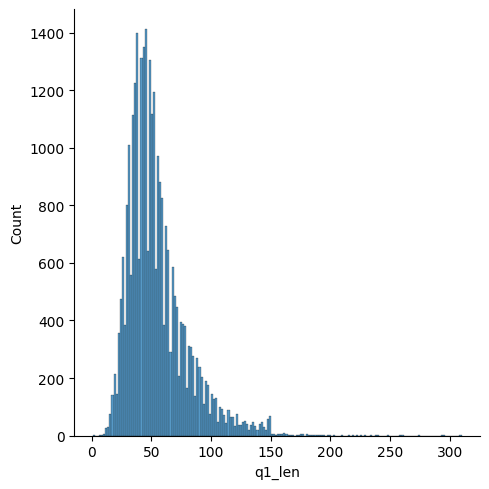

In [57]:
sns.displot(new_data["q1_len"])
print("minimum",new_data["q1_len"].min())
print("max",new_data["q1_len"].max())
print("average character",new_data["q1_len"].mean())

minimum 4
max 307
average character 54.7046


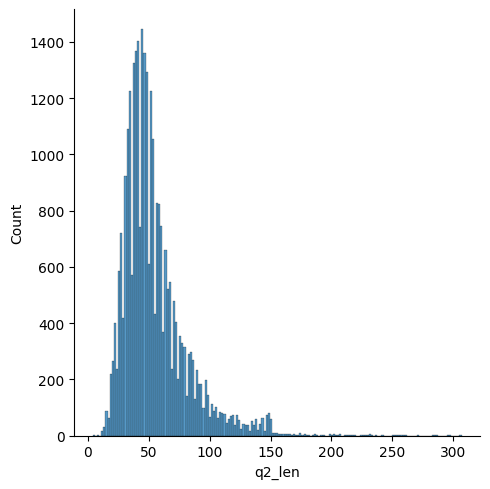

In [58]:
sns.displot(new_data["q2_len"])
print("minimum",new_data["q2_len"].min())
print("max",new_data["q2_len"].max())
print("average character",new_data["q2_len"].mean())

/tmp/ipykernel_12804/1528240758.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[new_data['is_duplicate'] == 0]['common_word'],label='non duplicate')
/tmp/ipykernel_12804/1528240758.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data[new_data['is_duplicate'] == 1]['common_wo

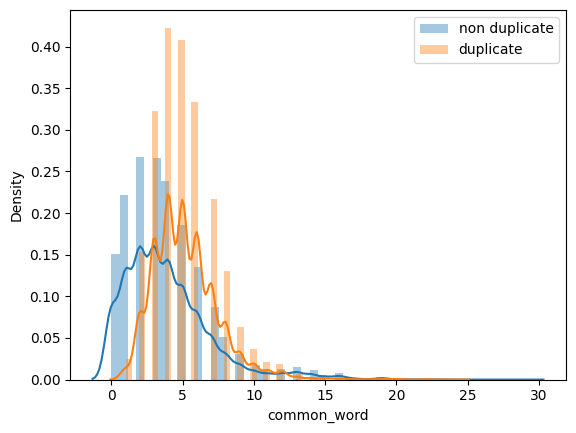

In [60]:


# common words
sns.distplot(new_data[new_data['is_duplicate'] == 0]['common_word'],label='non duplicate')
sns.distplot(new_data[new_data['is_duplicate'] == 1]['common_word'],label='duplicate')
plt.legend()
plt.show()



In [61]:
ques_data=new_data[['question1',"question2"]]
ques_data

,question1,question2
297803,How many gallons are in a 100 lb propane tank?,How much propane can a 2.5 lb tank hold?
99927,Is it theoretically possible to travel through...,Is it possible to travel to alternate universe?
175435,How do you serve pierogi?,What are some great ways to serve pierogies?
268694,Which is the best attack strategy for TH5 in C...,Clash of Clans: How can I make my base stronge...
232503,Which company is better for a fresher to join ...,Which is better to join as a fresher: Cognizan...
...,...,...
113654,Does critical thinking help to burn calories?,Does thinking really hard burn more calories?
234623,How can you determine if a bacteria es eukarotic?,How can you determine if bacteria is eukaryotic?
181639,How do I naturally gain testosterone?,How many hours / week need to be practised in ...
166961,Why don’t some Americans believe in God?,Why don’t some people believe in God?


In [62]:
final_data = new_data.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_data.shape)
final_data.head()

(30000, 9)


,index,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,common_word,word_total,word_share
297803,297803,0,46,40,10,9,4,19,0.21
99927,99927,1,65,47,9,8,6,16,0.38
175435,175435,1,25,44,5,8,1,13,0.08
268694,268694,0,60,64,12,12,2,24,0.08
232503,232503,0,81,61,15,11,8,26,0.31


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
question=list(ques_data["question1"])+list(ques_data["question1"])
cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)

In [65]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_data.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_data.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape


(30000, 6000)

In [66]:
final_df = pd.concat([final_data, temp_df], axis=1)
print(final_df.shape)
final_df.head()


(30000, 6009)


,index,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,common_word,word_total,word_share,0,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
297803,297803,0,46,40,10,9,4,19,0.21,0,...,0,0,0,0,0,0,0,0,0,0
99927,99927,1,65,47,9,8,6,16,0.38,0,...,0,0,0,0,0,0,0,0,0,0
175435,175435,1,25,44,5,8,1,13,0.08,0,...,0,0,1,0,0,0,0,0,0,0
268694,268694,0,60,64,12,12,2,24,0.08,0,...,0,0,0,0,0,0,0,0,0,0
232503,232503,0,81,61,15,11,8,26,0.31,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

/home/riifat/.local/lib/python3.13/site-packages/sklearn/utils/multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
/home/riifat/.local/lib/python3.13/site-packages/sklearn/utils/multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)
